# 3.2_KNN

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Veri seti incelenmesi

cancer = load_breast_cancer()
print(cancer.keys())
print(cancer['feature_names'])

df = pd.DataFrame( cancer.data , columns = cancer.feature_names )
df["target"] = cancer.target

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# 3.3 KNN Sınıflandırma

In [ ]:
# Model Seçimi - Sınıflandırıcı 
# Model Train Edilmesi

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

X = cancer.data # fea
y = cancer.target # target

# train etme 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# olceklendirme 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# knn modeli olustur ve train et
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train , y_train)

# sonucları degerlendirme
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
con = confusion_matrix(y_test, y_pred)
print(con)

0.9590643274853801
[[ 59   4]
 [  3 105]]


# 3.4 Hiperparam

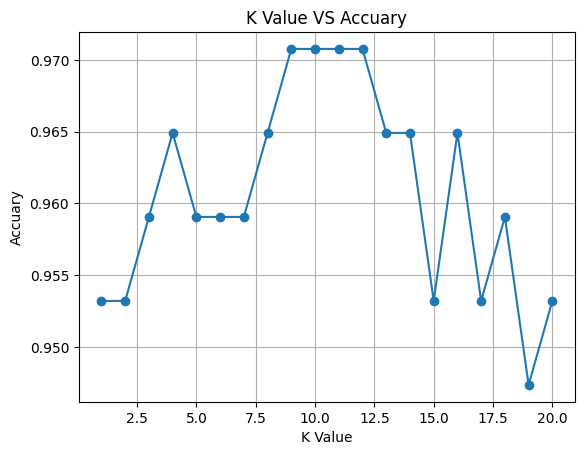

In [ ]:
from matplotlib import pyplot as plt

acc_value = []
k_values = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_value.append(acc)
    k_values.append(k)

plt.figure()
plt.plot(k_values, acc_value, marker =  "o", linestyle = "-")
plt.title("K Value VS Accuary")
plt.xlabel("K Value")
plt.ylabel("Accuary")
plt.grid()

# 3.5 Knn Reg

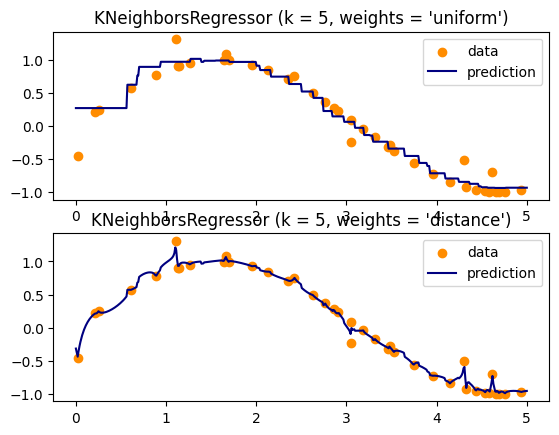

In [27]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

X = np.sort(5 * np.random.rand(40,1), axis= 0) 
y = np.sin(X).ravel()

y[::5] += 1 *(0.5 - np.random.rand(8))

T = np.linspace(0, 5, 500)[:, np.newaxis]

knn = KNeighborsRegressor(n_neighbors=5)

for i, weight in enumerate(["uniform", "distance"]):

    knn = KNeighborsRegressor(n_neighbors=5, weights=weight)
    y_p = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_p, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = 5, weights = '%s')" % (weight))
